<a href="https://colab.research.google.com/github/HrithikGoswami/pentium/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#STOCK PREDICTION: This program uses an artificial recurrent neural network LSTM 
#                  to predict the closing stock price of Microsoft Corp. using 
#                  the past 60 days stock price. 

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [69]:
#Get the stock quote
df = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2020-02-15')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,22.080940
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.600586
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.831539
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.186216
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.881027
...,...,...,...,...,...,...
2020-02-10,188.839996,183.250000,183.580002,188.699997,35844300.0,188.699997
2020-02-11,190.699997,183.500000,190.649994,184.440002,53159900.0,184.440002
2020-02-12,185.850006,181.850006,185.580002,184.710007,47062900.0,184.710007


In [70]:
df.shape

(2043, 6)

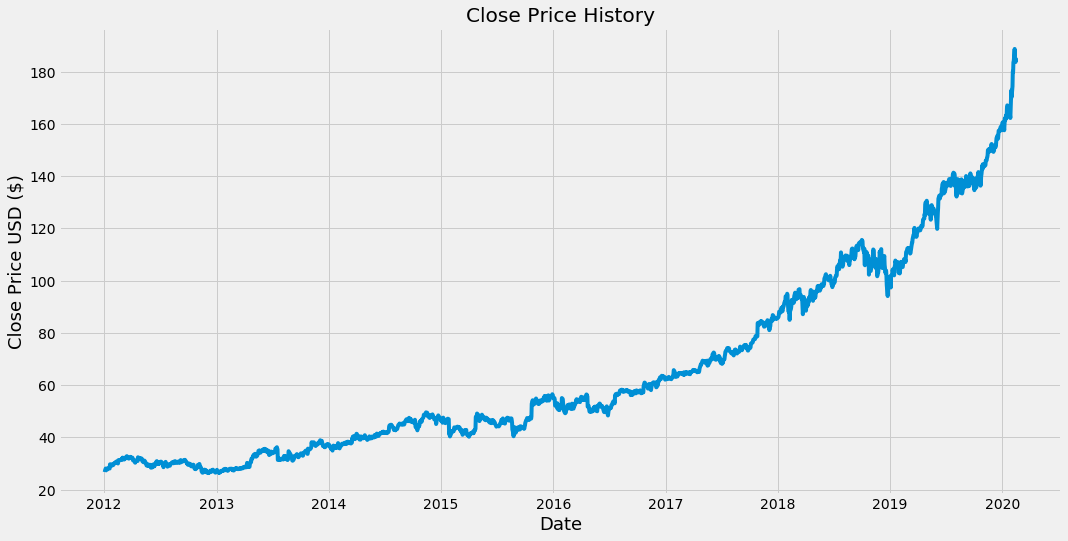

In [71]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [73]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1635

In [74]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00246411],
       [0.00634509],
       [0.00806998],
       ...,
       [0.9754205 ],
       [0.96926021],
       [0.97936308]])

In [75]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02057536, 0.02069857, 0.01829606,
       0.01965132, 0.01928171, 0.01761842, 0.01995934, 0.01946652,
       0.02168422, 0.02205384, 0.02384032, 0.02359391, 0.02451796,
       0.02642764, 0.02710528, 0.025442  , 0.02593482, 0.02390192,
       0.02266986, 0.03030863, 0.03006221, 0.03123267, 0.03018542,
       0.03080145, 0.03147908, 0.03067825, 0.0338816 , 0.03308076,
       0.03646892, 0.03517527, 0.03345037, 0.0319719 , 0.03369679,
       0.03474403, 0.03462083, 0.03492885, 0.03880982, 0.03942586,
       0.03991867, 0.0383786 , 0.0359145 , 0.03462083, 0.03412801,
       0.03468243, 0.03474403, 0.03831701, 0.03788579, 0.03585288])]
[0.03542166100213601]

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [77]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1575, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [80]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1575/1575 [==============================] - 129s 82ms/step - loss: 3.4631e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [85]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.743195937847522

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


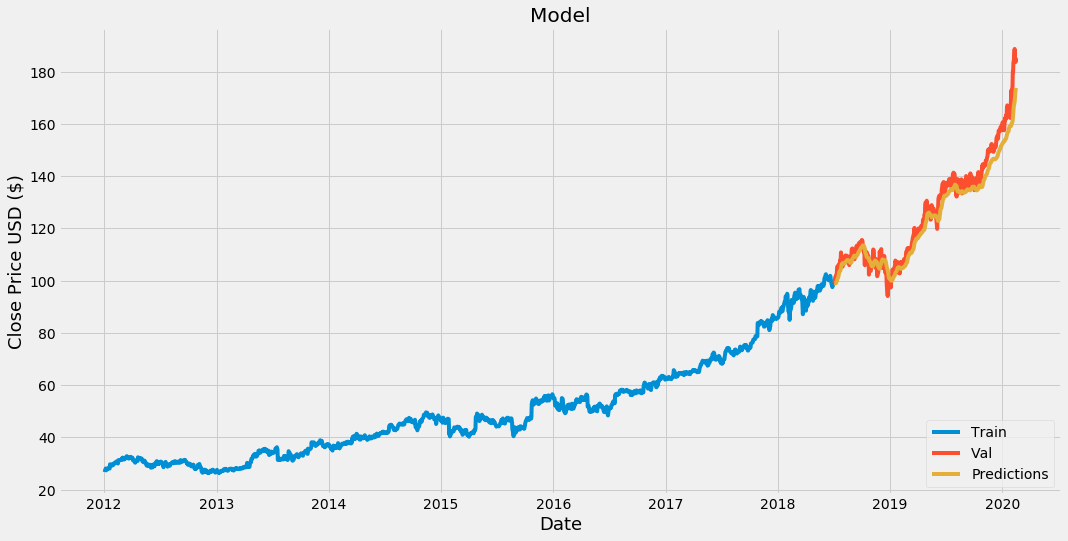

In [86]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [87]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-03,99.050003,99.002373
2018-07-05,99.760002,98.921280
2018-07-06,101.160004,98.921448
2018-07-09,101.849998,99.081619
2018-07-10,102.120003,99.374123
...,...,...
2020-02-10,188.699997,168.363159
2020-02-11,184.440002,170.286911
2020-02-12,184.710007,171.796570


In [90]:
#Get the quote
microsoft_quote = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2020-02-15')
#Create a new dataframe
new_df = microsoft_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[174.40517]]


In [91]:
#Get the quote
microsoft_quote2 = web.DataReader('MSFT', data_source='yahoo', start='2020-02-15', end='2020-02-16')
print(microsoft_quote2['Close'])

Date
2020-02-14    185.350006
Name: Close, dtype: float64


#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)